In [1]:
import pandas as pd
import numpy as np
import glob 
import os
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse

In [49]:
def load_dataframes(path, acc_column, sort_col_name, ascending=True):
    """
    
    Parameters
    ----------
    
    path: string,
        path to the dataframes.
    acc_column: int,
        column containing the test accuracy of the classifier.
    sort_col_name: string:
        name of the column along which to sort the dataframe entries. (Usually is the 'RP' number.)
    ascending: boolean,
        If True, sort the dataframe in ascending order. Defaults to True.
    Returns
    -------
    
    dataframes: list of DataFrames,
        list of pandas DataFrames.
    final_data: list,
        contains the data on the run with the highest accuracy.
    """
    
    allFiles = glob.glob(path + "/*.csv")
    dataframes = []
    
    for file in allFiles:
        df = pd.read_csv(file, sep='\t')
        dataframes.append(df)
    
    final_data = []

    for dataframe in dataframes:
        
        best_run_idx = dataframe[acc_column].idxmax()
        best_run = pd.DataFrame([dataframe.iloc[best_run_idx]])
        final_data.append(best_run.values)

    final_data = np.concatenate(final_data)
    best_runs = pd.DataFrame(final_data, columns=list(dataframes[0].columns.values)).sort_values(by=[sort_col_name], 
                                                                                                 ascending=ascending)
    
    return best_runs.reset_index(drop=True), dataframes, final_data

In [50]:
model_name, model_options = 'resnet18', 'noavgpool'
OPU = "Saturn"

new_path = "/home/luca/Desktop/TL/Blogpost/TL_blogpost/data/naive"

base_save_path = '/home/luca/Desktop/TL/report_stage2_inference/img/naive/'
image_path = '/home/luca/stage2_data/naive_quantization/images/'

img_format='svg'

In [51]:
n_components = str(10000)
dtype = "float32"

path_S = os.path.join(new_path, "{}_{}_brutal".format(model_name, OPU))


OPU_path = os.path.join(path_S, "OPU_{}_{}_{}".format(n_components, model_options, dtype))
print(os.path.join(OPU_path, "train"))

train, _, _ = load_dataframes(os.path.join(OPU_path, "train"), "acc_test", 'model size [MB]', ascending=False)
inference, _, _ = load_dataframes(os.path.join(OPU_path, "inference"), "inference time", 'model size [MB]', ascending=False)
backprop, _, _ = load_dataframes(os.path.join(path_S, "backprop"), "test accuracy", 'model size-tot', ascending=False)


/home/luca/Desktop/TL/Blogpost/TL_blogpost/data/naive/resnet18_Saturn_brutal/OPU_10000_noavgpool_float32/train


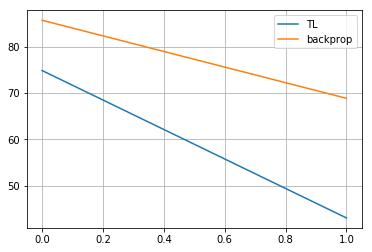

In [60]:
plt.plot(train["acc_test"], label="TL")
plt.plot(backprop["test accuracy"], label="backprop")
plt.legend()
plt.grid()
plt.show()